## Sentiment Analysis with Tweepy

### Set up environment

In [17]:
!pip install tweepy==4.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Twitter Authentication

In [19]:
#Using Tweeter Api
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAIxOjwEAAAAAtL64LJjZYQQ4s7tULpb1reRFtLk%3DkdhajCRlNB3qXRC7doVhjXp4XqqVsZPVhrbstLYrxeDQihq1xn')

### Get recent public tweets on a keyword

In [20]:
# Pull tweets from twitter

query = '#iPhone14 -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=50                               # How many pages to retrieve
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten():  # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

⚡️A word of caution to investors⚡️

Those who own #RVNL should sell on this strength or else they will be disappointed because it's too extended from the 50 EMA.

When smart money begins to sell, you will have no chance to exit. https://t.co/EPwYcg6i9o
My Avg. price of #RVNL is 18 (courtesy me buying aggressively during 2020 Crash)

At 18 the Mkt. Cap is around 3600 Cr. 

In H1 FY23,  it has bagged orders worth 8200 Cr. &amp; is confident of bagging 20,000 Cr orders by End of FY23. Orderbook stands at 55,000 Cr.

That’s the tweet!
#rvnl  1x within 1 months 

Super se 💖 https://t.co/krPCcU8iRy
FRESH #BREAKOUTS (November 28th)

#RVNL(Above 74)
#APOLLOTYRES(Above 305)
#IRFC(Above 32)
#GESHIP(Above 675)
#CEAT(Above 1845)
#ENGINEERSIND(Above 82)
#NCC(Above 82)
#HARIOMPIPE(Above 320)
#POWERMECH(Above 2145)
#HONDAPOWER(Above 2570)

#PlanYourTrade
#FII DII Activity

Follow @StockInvesta now

#StockMarket #niftyOptions #banknifty #Sensex #StocksToBuy #StocksInFocus #DowJones #Nasdaq #StockMarke

In [21]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,⚡️A word of caution to investors⚡️\n\nThose wh...
1,My Avg. price of #RVNL is 18 (courtesy me buyi...
2,#rvnl 1x within 1 months \n\nSuper se 💖 https...
3,FRESH #BREAKOUTS (November 28th)\n\n#RVNL(Abov...
4,#FII DII Activity\n\nFollow @StockInvesta now\...


### Data preprocessing

In [22]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [23]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [24]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,⚡️A word of caution to investors⚡️\n\nThose wh...,word of caution to investors those who own rv...
1,My Avg. price of #RVNL is 18 (courtesy me buyi...,my avg price of rvnl is 18 courtesy me buying ...
2,#rvnl 1x within 1 months \n\nSuper se 💖 https...,rvnl 1x within 1 months super se
3,FRESH #BREAKOUTS (November 28th)\n\n#RVNL(Abov...,fresh breakouts november 28th rvnl above 74 ap...
4,#FII DII Activity\n\nFollow @StockInvesta now\...,fii dii activity follow now stockmarket nifty...


### Generate Sentiment Labels

In [25]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,⚡️A word of caution to investors⚡️\n\nThose wh...,word of caution to investors those who own rv...,0.021429,0.797619,positive,0.107,0.724,0.170,0.4854
1,My Avg. price of #RVNL is 18 (courtesy me buyi...,my avg price of rvnl is 18 courtesy me buying ...,0.400000,0.466667,positive,0.080,0.799,0.121,0.3818
2,#rvnl 1x within 1 months \n\nSuper se 💖 https...,rvnl 1x within 1 months super se,0.333333,0.666667,positive,0.000,0.562,0.438,0.5994
3,FRESH #BREAKOUTS (November 28th)\n\n#RVNL(Abov...,fresh breakouts november 28th rvnl above 74 ap...,0.027273,0.136364,positive,0.000,0.937,0.063,0.3182
4,#FII DII Activity\n\nFollow @StockInvesta now\...,fii dii activity follow now stockmarket nifty...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


### Sentiment Visualisation

In [26]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

#### Donut Charts

In [27]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [28]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
positive,129,48.86
neutral,115,43.56
negative,20,7.58


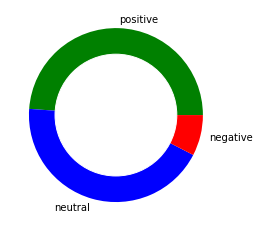

In [29]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Word Clouds

In [30]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Project9_TwitterAPI_Sentiments
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Project9_TwitterAPI_Sentiments
a1_inputs		      c1_wordcloud.png
a2_preprocessing_function.py  c2_sentimentanalysis_output.csv


In [31]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("./a1_inputs/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

Word Cloud Saved Successfully


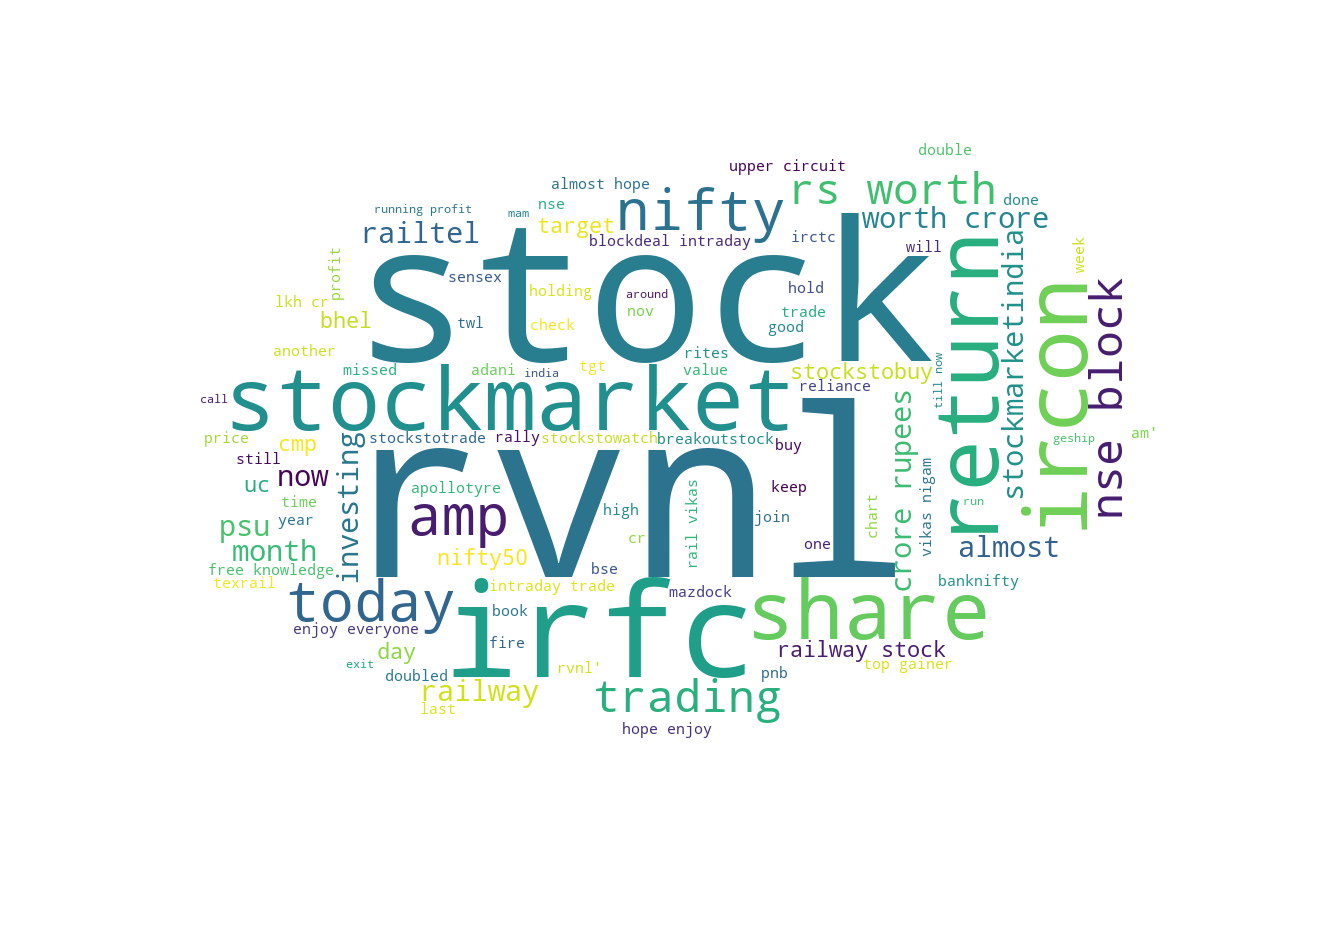

In [32]:
# Creating wordcloud for all tweets

create_wordcloud(tweet_list_df["cleaned"].values)
# create_wordcloud(tweet_list_df_positive["text"].values)
# create_wordcloud(tweet_list_df_negative["cleaned"].values)
# create_wordcloud(tweet_list_df_neutral["text"].values)

#### Text Insights

In [33]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [34]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,75.00
neutral,80.65
positive,138.86


In [35]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.80
neutral,13.93
positive,25.05


### Saving Output Tweets File to Drive

1.   List item
2.   List item



In [36]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,⚡️A word of caution to investors⚡️\n\nThose wh...,word of caution to investors those who own rv...,0.021429,0.797619,positive,0.107,0.724,0.170,0.4854,216,41
1,My Avg. price of #RVNL is 18 (courtesy me buyi...,my avg price of rvnl is 18 courtesy me buying ...,0.400000,0.466667,positive,0.080,0.799,0.121,0.3818,264,55
2,#rvnl 1x within 1 months \n\nSuper se 💖 https...,rvnl 1x within 1 months super se,0.333333,0.666667,positive,0.000,0.562,0.438,0.5994,34,7
3,FRESH #BREAKOUTS (November 28th)\n\n#RVNL(Abov...,fresh breakouts november 28th rvnl above 74 ap...,0.027273,0.136364,positive,0.000,0.937,0.063,0.3182,225,35
4,#FII DII Activity\n\nFollow @StockInvesta now\...,fii dii activity follow now stockmarket nifty...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,241,25
